In [1]:
import Bio.PDB
import numpy

pdb_code = "6C04"
pdb_filename = "6C04_r_f.pdb"

In [2]:
def calc_residue_dist(residue_one, residue_two) :
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return numpy.sqrt(numpy.sum(diff_vector * diff_vector))

def calc_dist_matrix(chain_one, chain_two) :
    """Returns a matrix of C-alpha distances between two chains"""
    answer = numpy.zeros((len(chain_one), len(chain_two)), numpy.float)
    for row, residue_one in enumerate(chain_one) :
        for col, residue_two in enumerate(chain_two) :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return answer

In [3]:
structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

/home/sneha/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3456
  warnings.warn(
/home/sneha/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 6946
  warnings.warn(
/home/sneha/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 24161
  warnings.warn(
/home/sneha/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 44295
  warnings.warn(
/home/sneha/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 45577
  warnings.warn(
/home/sneha/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 50712
  warnings.warn(
/home/

In [21]:
dist_matrix = calc_dist_matrix(model,model)
contact_map = dist_matrix < 5.0

<ipython-input-2-fed8a3a3aff3>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  answer = numpy.zeros((len(chain_one), len(chain_two)), numpy.float)


KeyError: 'CA'

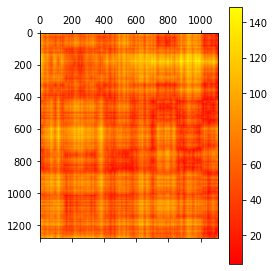

In [22]:
import pylab
pylab.matshow(numpy.transpose(dist_matrix))
pylab.colorbar()
pylab.show()

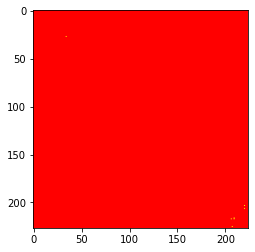

In [7]:
pylab.autumn()
pylab.imshow(numpy.transpose(contact_map))
pylab.show()

In [8]:
import rpy
rpy.r.library("gplots")
rpy.r.png("1XI4_D-M.png", width=600, height=300)
rpy.r.filled_contour(x=rpy.r("1:1630"), \
                     # residue numbers in heavy chain
                     y=rpy.r("95:164"), \
                     # residue numbers in light chain
                     z=dist_matrix, \
                     xlab="Heavy chain M", \
                     ylab="Light chain D", \
                     levels=[0,6,14,20,200], \
                     col=rpy.r.colorpanel(4, "red", "white"),
                     main="Protein Contact Map for Clathrin Cage")
rpy.r.dev_off() # close the image file

ModuleNotFoundError: No module named 'rpy'